## Fetching Data

In [8]:
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_x,train_y) ,(test_x,test_y) = mnist.load_data()

## train_y and test_y is of size 60k with labelled values

In [3]:
train_x.shape

(60000, 28, 28)

In [4]:
test_x.shape

(10000, 28, 28)

In [7]:
test_y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Data visualization

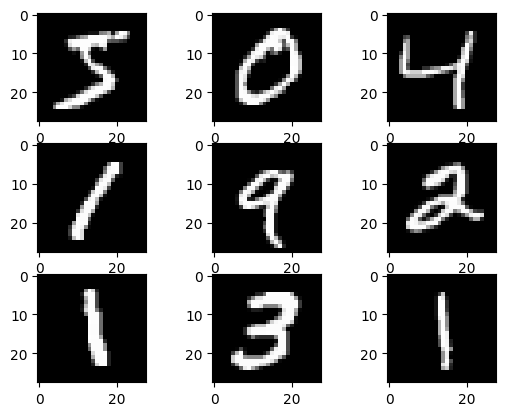

In [6]:
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(train_x[i],cmap='grey')
plt.show()

# Normalizing the data (for x train and testing data)
(We want the values to be in between 0-1 but our data ranges between 0-255 so we divide the dataset by 255)

In [9]:
x_train = train_x/255
x_test = test_x/255

## ANN model
* ANN network consists of 3 layers
* 1st layer take 784(28x28) input
* 2nd layer take 128 I/Ps
* 3rd layer is the output layer consists of 10 nodes
* it takes the max value out of the 10 nodes and returns that as output

## Model details
* One img is 28x28. It is a 2D matrix, we need to flatten it to feed it into our neural network to do this we use Flatten()
* relu is the rectifier that returns the value as itself if it is >=0 else it will return 0

## Loss functions 
* If we use sparse_categorical_crossentropy then we dont need to hot encode our y_training and testing dataset
* Otherwise we'll use categorical_crossentropy

## Activation function
* relu - commonly used
* softmax - when the output layer has more than 1 node and is categorical data we use this function 

In [37]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

# Model Summary
* 1st dense - 100480 -> 784(input)*128(2nd layer input)(weights) + 128(biases)
* output layer - 1290 -> 128*10 + 10

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam',metrics=['accuracy'])

In [40]:
history = model.fit(x_train,train_y,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2842 - accuracy: 0.9184 - val_loss: 0.1482 - val_accuracy: 0.9578
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1257 - accuracy: 0.9635 - val_loss: 0.1187 - val_accuracy: 0.9665
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0852 - accuracy: 0.9749 - val_loss: 0.0974 - val_accuracy: 0.9696
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0627 - accuracy: 0.9812 - val_loss: 0.1041 - val_accuracy: 0.9706
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0479 - accuracy: 0.9857 - val_loss: 0.0895 - val_accuracy: 0.9729
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0377 - accuracy: 0.9887 - val_loss: 0.0870 - val_accuracy: 0.9736
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss: 0.0893 - val_accuracy:

In [41]:
y_prob = model.predict(test_x)

313/313 [==============================] - 1s 2ms/step


In [42]:
y_pred = y_prob.argmax(axis=1)

## Model Accuracy

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(test_y,y_pred)

0.9767

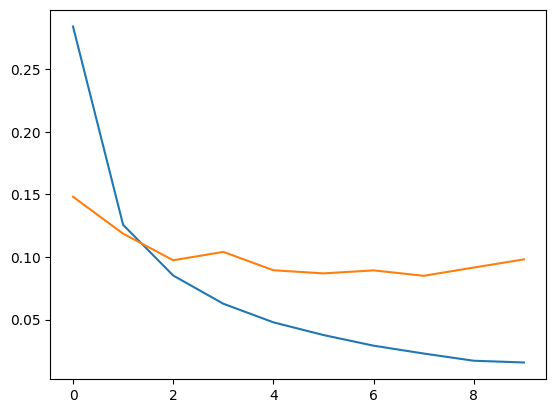

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

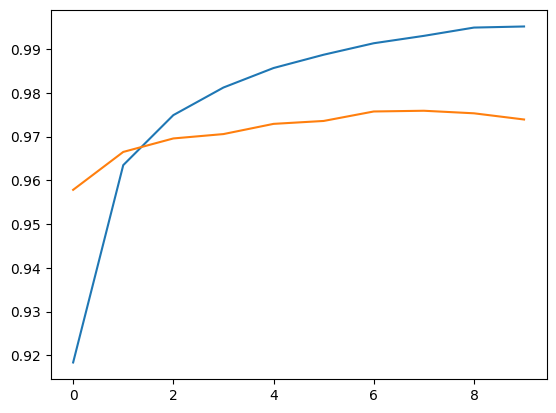

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])